# Загрузка данных

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Данные взяты с сайта kaggle
[пользователи Netflix](https://www.kaggle.com/datasets/arnavsmayan/netflix-userbase-dataset)

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('/content/drive/MyDrive/Аналитик_Зерокод/netflix_users_data.csv')

In [4]:
df

,User ID,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device,Plan Duration
0,1,Basic,10,15-01-22,10-06-23,United States,28,Male,Smartphone,1 Month
1,2,Premium,15,05-09-21,22-06-23,Canada,35,Female,Tablet,1 Month
2,3,Standard,12,28-02-23,27-06-23,United Kingdom,42,Male,Smart TV,1 Month
3,4,Standard,12,10-07-22,26-06-23,Australia,51,Female,Laptop,1 Month
4,5,Basic,10,01-05-23,28-06-23,Germany,33,Male,Smartphone,1 Month
...,...,...,...,...,...,...,...,...,...,...
2495,2496,Premium,14,25-07-22,12-07-23,Spain,28,Female,Smart TV,1 Month
2496,2497,Basic,15,04-08-22,14-07-23,Spain,33,Female,Smart TV,1 Month
2497,2498,Standard,12,09-08-22,15-07-23,United States,38,Male,Laptop,1 Month
2498,2499,Standard,13,12-08-22,12-07-23,Canada,48,Female,Tablet,1 Month


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   User ID            2500 non-null   int64 
 1   Subscription Type  2500 non-null   object
 2   Monthly Revenue    2500 non-null   int64 
 3   Join Date          2500 non-null   object
 4   Last Payment Date  2500 non-null   object
 5   Country            2500 non-null   object
 6   Age                2500 non-null   int64 
 7   Gender             2500 non-null   object
 8   Device             2500 non-null   object
 9   Plan Duration      2500 non-null   object
dtypes: int64(3), object(7)
memory usage: 195.4+ KB


# Приведение столбцов к стилю camel_case

In [6]:
df.columns

Index(['User ID', 'Subscription Type', 'Monthly Revenue', 'Join Date',
       'Last Payment Date', 'Country', 'Age', 'Gender', 'Device',
       'Plan Duration'],
      dtype='object')

In [7]:
# Функция для преобразования в camelCase
def to_camel_case(s):
    parts = s.split()
    return parts[0].lower() + ''.join(word.capitalize() for word in parts[1:])

In [8]:
# Преобразуем названия столбцов в camelCase
df.columns = [to_camel_case(column) for column in df.columns]
df.columns

Index(['userId', 'subscriptionType', 'monthlyRevenue', 'joinDate',
       'lastPaymentDate', 'country', 'age', 'gender', 'device',
       'planDuration'],
      dtype='object')

# Приведение типов данных

In [9]:
#привести дату к типу datetime

In [10]:
df['joinDate'] = pd.to_datetime(df['joinDate'], format='%d-%m-%y', dayfirst=True)
df['lastPaymentDate'] = pd.to_datetime(df['lastPaymentDate'], format='%d-%m-%y', dayfirst=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   userId            2500 non-null   int64         
 1   subscriptionType  2500 non-null   object        
 2   monthlyRevenue    2500 non-null   int64         
 3   joinDate          2500 non-null   datetime64[ns]
 4   lastPaymentDate   2500 non-null   datetime64[ns]
 5   country           2500 non-null   object        
 6   age               2500 non-null   int64         
 7   gender            2500 non-null   object        
 8   device            2500 non-null   object        
 9   planDuration      2500 non-null   object        
dtypes: datetime64[ns](2), int64(3), object(5)
memory usage: 195.4+ KB


# Поиск дублей и пропусков в данных

In [11]:
# Поиск дубликатов. Посчитаем количечтво дубликатов
df.duplicated().sum()
#удаление явных дубликатов
#df_2 = df_1.drop_duplicates()

0

In [12]:
# Поиск пропущенных данных
#df.isna().sum()
missing_data = df.isnull().sum()
print("\nКоличество пропущенных данных в каждом столбце:")
print(missing_data)


Количество пропущенных данных в каждом столбце:
userId              0
subscriptionType    0
monthlyRevenue      0
joinDate            0
lastPaymentDate     0
country             0
age                 0
gender              0
device              0
planDuration        0
dtype: int64


# Исследовательский анализ данных

In [13]:
df

,userId,subscriptionType,monthlyRevenue,joinDate,lastPaymentDate,country,age,gender,device,planDuration
0,1,Basic,10,2022-01-15,2023-06-10,United States,28,Male,Smartphone,1 Month
1,2,Premium,15,2021-09-05,2023-06-22,Canada,35,Female,Tablet,1 Month
2,3,Standard,12,2023-02-28,2023-06-27,United Kingdom,42,Male,Smart TV,1 Month
3,4,Standard,12,2022-07-10,2023-06-26,Australia,51,Female,Laptop,1 Month
4,5,Basic,10,2023-05-01,2023-06-28,Germany,33,Male,Smartphone,1 Month
...,...,...,...,...,...,...,...,...,...,...
2495,2496,Premium,14,2022-07-25,2023-07-12,Spain,28,Female,Smart TV,1 Month
2496,2497,Basic,15,2022-08-04,2023-07-14,Spain,33,Female,Smart TV,1 Month
2497,2498,Standard,12,2022-08-09,2023-07-15,United States,38,Male,Laptop,1 Month
2498,2499,Standard,13,2022-08-12,2023-07-12,Canada,48,Female,Tablet,1 Month


In [14]:
# сколько уникальных пользователей?

In [15]:
unique_user_count = df['userId'].nunique()
print(f"Количество уникальных клиентов: {unique_user_count}")

Количество уникальных клиентов: 2500


In [16]:
# изучить возраст пользователей (визуализировать)

count    2500.000000
mean       38.795600
std         7.171778
min        26.000000
25%        32.000000
50%        39.000000
75%        45.000000
max        51.000000
Name: age, dtype: float64


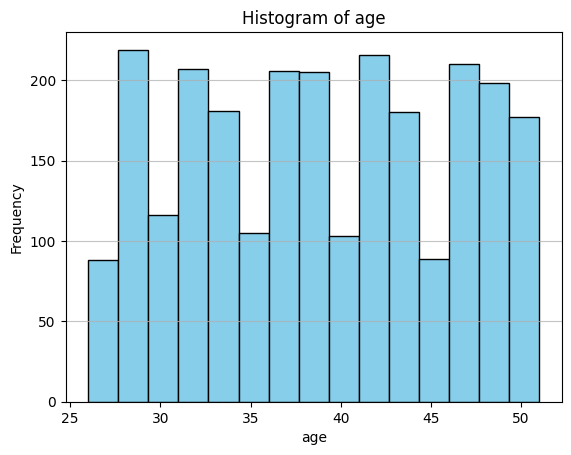

In [17]:
# Изучение распределения значений в столбце age
print(df['age'].describe())

# Построение гистограммы
plt.hist(df['age'], bins=15, color='skyblue', edgecolor='black')
plt.title('Histogram of age')
plt.xlabel('age')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()

распределние клиентов по возрасту равномерное
Минимальный возраст - 26 лет, средний - 3838, а самый пожилой клент в возрасте 51 год

In [18]:
# изучить пол пользователей (визуализировать)

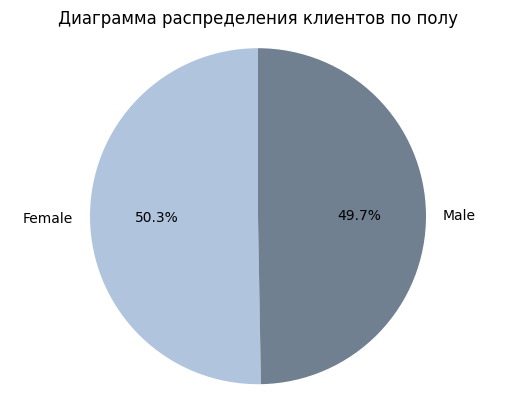

In [19]:
# Подсчет количества мужчин и женщин
gender_counts = df['gender'].value_counts()
# Построение круговой диаграммы
colors = ['#B0C4DE', '#708090']  # Светло-голубой и серый цвет
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=90, colors=colors)
plt.title('Диаграмма распределения клиентов по полу')
plt.axis('equal')  # Убедиться, что круговая диаграмма круглая
plt.show()

Количество мужчин и женщин практически одинаково (49,7% и 50,3% соответственно)

In [20]:
# изучить девайсы пользователей (визуализировать)

In [21]:
# Подсчёт количества пользователей по каждому устройству
device_counts = df['device'].value_counts()
device_counts

,count
device,
Laptop,636
Tablet,633
Smartphone,621
Smart TV,610


<ipython-input-49-5ca8d9b170b4>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=device_counts.index, y=device_counts.values, palette='viridis')


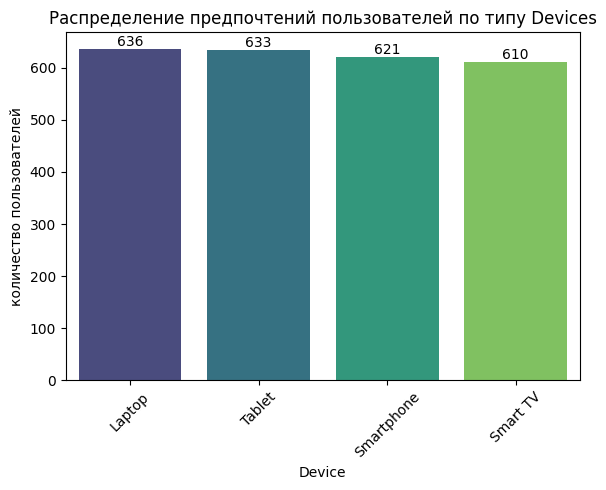

In [49]:
plt.figure(figsize=(6, 5))

# Используем seaborn для более стильной визуализации
sns.barplot(x=device_counts.index, y=device_counts.values, palette='viridis')

# Добавляем подписи и заголовок
plt.title('Распределение предпочтений пользователей по типу Devices')
plt.xlabel('Device')
plt.ylabel('количество пользователей')

# Поворот меток на оси X, если необходимо
plt.xticks(rotation=45)

# Добавляем значения над каждым столбцом
for index, value in enumerate(device_counts.values):
    plt.text(index, value, str(value), ha='center', va='bottom')

# Отображение графика
plt.tight_layout()
plt.show()

Самый популярный девайс у пользователей - Laptop, на втором месте - Tablet, третье место - Smartphone, самый непопулярный девайс - Smart TV

In [23]:
# изучить тип подписки пользователей (визуализировать)

In [24]:
# Подсчёт количества пользователей по каждому аиду подписки
subscriptionType_counts = df['subscriptionType'].value_counts()
subscriptionType_counts

,count
subscriptionType,
Basic,999
Standard,768
Premium,733


<ipython-input-51-8f0a20291f58>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=subscriptionType_counts.index, y=subscriptionType_counts.values, palette='viridis')


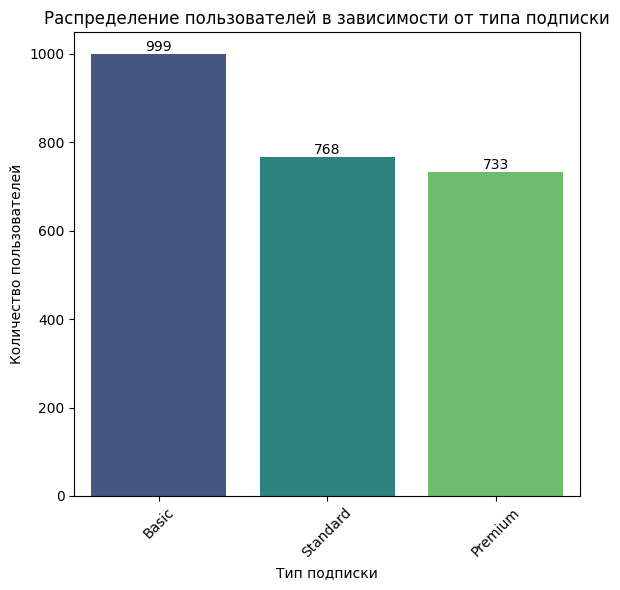

In [51]:
plt.figure(figsize=(6, 6))

# Используем seaborn для более стильной визуализации
sns.barplot(x=subscriptionType_counts.index, y=subscriptionType_counts.values, palette='viridis')

# Добавляем подписи и заголовок
plt.title('Распределение пользователей в зависимости от типа подписки')
plt.xlabel('Тип подписки')
plt.ylabel('Количество пользователей')

# Добавление значений над каждым столбцом
for index, value in enumerate(subscriptionType_counts.values):
    plt.text(index, value, str(value), ha='center', va='bottom')

# Поворот меток на оси X, если необходимо
plt.xticks(rotation=45)

# Отображение графика
plt.tight_layout()
plt.show()

Самая популярная подписка - Basic (999). Подписка Standard (768) превышает Premium (733) символически

In [26]:
# изучить локацию пользователей (визуализировать)

In [27]:
# Группировка данных по странам и подсчет количества пользователей в каждой стране
country_counts = df['country'].value_counts()
country_counts

,count
country,
United States,451
Spain,451
Canada,317
United Kingdom,183
Australia,183
Germany,183
France,183
Brazil,183
Mexico,183


<ipython-input-53-c7549e1d2f6f>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=country_counts.index, y=country_counts.values, palette='viridis')


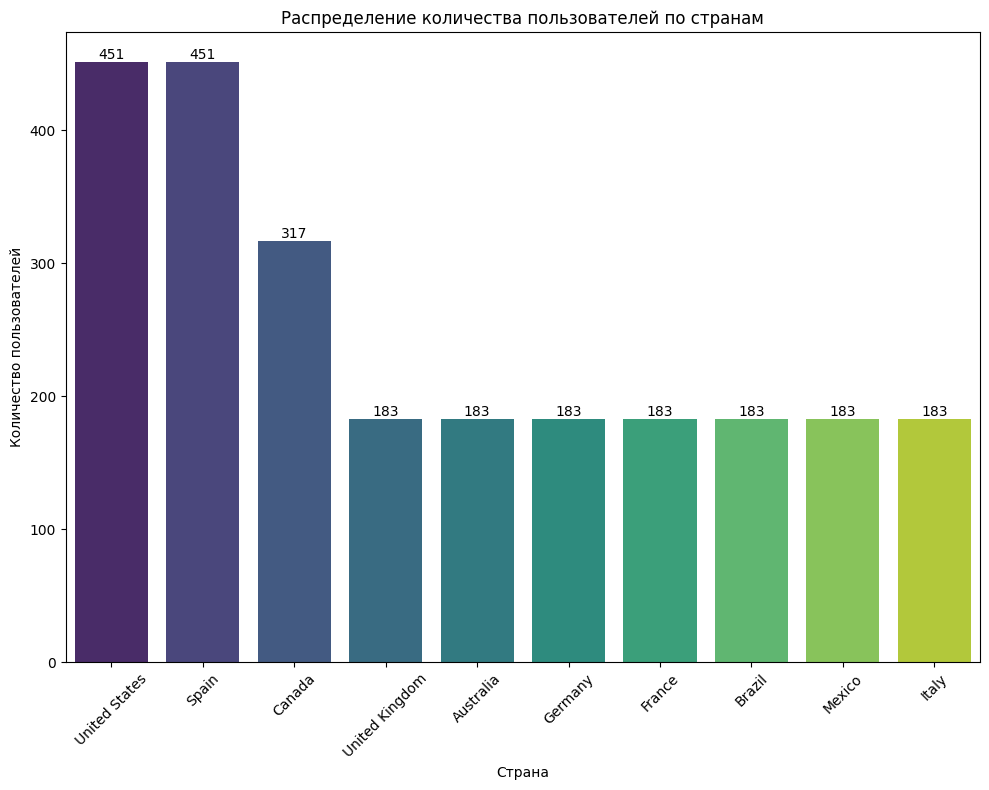

In [53]:
plt.figure(figsize=(10, 8))

# Построение столбчатой диаграммы
sns.barplot(x=country_counts.index, y=country_counts.values, palette='viridis')

# Добавление подписей и заголовка
plt.title('Распределение количества пользователей по странам')
plt.xlabel('Страна')
plt.ylabel('Количество пользователей')

# Поворот меток на оси X, если необходимо
plt.xticks(rotation=45)

# Добавление значений над каждым столбцом
for index, value in enumerate(country_counts.values):
    plt.text(index, value, str(value), ha='center', va='bottom')

# Применение компоновки для корректного отображения
plt.tight_layout()

# Для отображения графика, используйте plt.show() в вашей среде выполнения
# plt.show()

Больше всего пользователей в United States и Spain Canada (451). Чуть меньше в (317). В остальных странах польвателей менее чем по 183 человека

In [29]:
# изучить динамику привлечения пользователей (Join Date) - линейный график

In [30]:
# Группируем данные по году и месяцу и считаем количество пользователей
monthly_user_count = df['joinDate'].groupby(df['joinDate'].dt.to_period('M')).count()

# Преобразуем объекты Period в строки или datetime
monthly_user_count.index = monthly_user_count.index.to_timestamp()

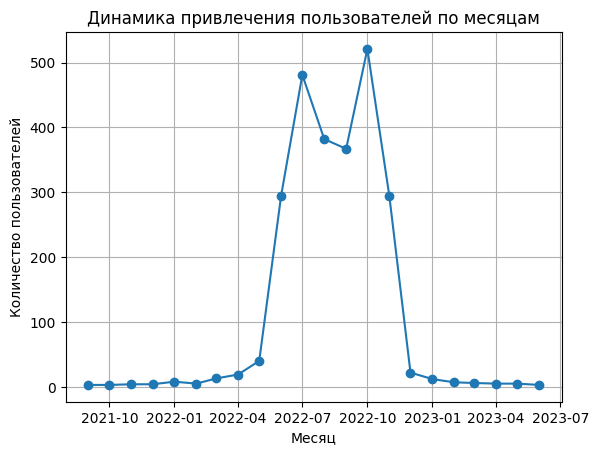

In [31]:
import matplotlib.pyplot as plt
# Построение линейного графика
plt.plot(monthly_user_count.index, monthly_user_count.values, marker='o')

# Добавление заголовков и подписей осей
plt.title('Динамика привлечения пользователей по месяцам')
plt.xlabel('Месяц')
plt.ylabel('Количество пользователей')
plt.grid(True)

# Отображение графика
plt.show()

с 2022-05 по 2022-11 наблюдался резкий приток клиентов

In [32]:
# изучть динамику выручки сервиса (накопленное Monthly Revenue по месяцу с момента Join Date до момента Last Payment Date)

In [33]:
# Создаем DataFrame для накопленной выручки по месяцам
revenue_data = []

# Проход по каждой строке в df
for _, row in df.iterrows():
    start_date = row['joinDate']
    end_date = row['lastPaymentDate']
    monthly_revenue = row['monthlyRevenue']

    # Создаем временной диапазон от start_date до end_date с шагом в один месяц
    date_range = pd.date_range(start=start_date, end=end_date, freq='MS')

    for date in date_range:
        revenue_data.append({'Month': date, 'Revenue': monthly_revenue})

# Преобразуем список в DataFrame
revenue_df = pd.DataFrame(revenue_data)

# Группируем данные по месяцу и считаем накопленную выручку
monthly_revenue_sum = revenue_df.groupby('Month')['Revenue'].sum().reset_index()

# Теперь monthly_revenue_sum содержит накопленную выручку по месяцам
monthly_revenue_sum

,Month,Revenue
0,2021-10-01,39
1,2021-11-01,78
2,2021-12-01,124
3,2022-01-01,176
4,2022-02-01,274
5,2022-03-01,363
6,2022-04-01,497
7,2022-05-01,738
8,2022-06-01,1274
9,2022-07-01,5189


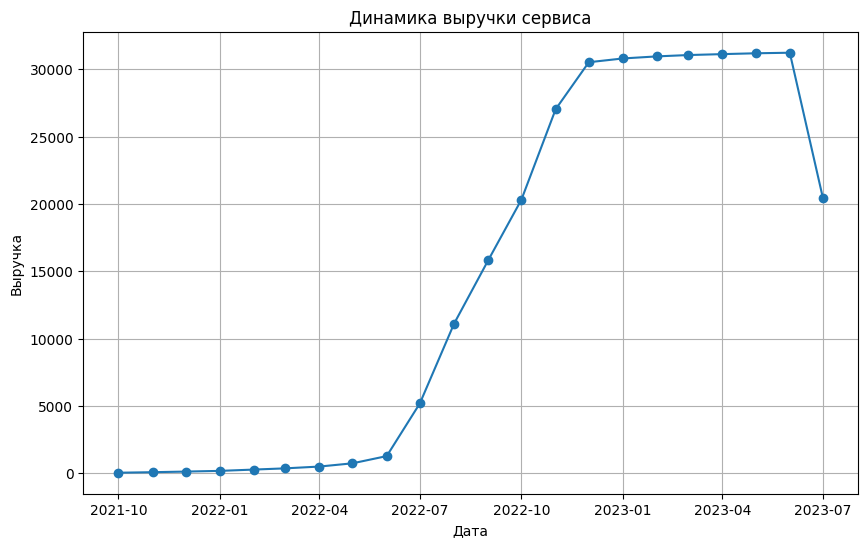

In [34]:
import matplotlib.pyplot as plt
# Построение линейного графика
plt.figure(figsize=(10, 6))
plt.plot(monthly_revenue_sum['Month'], monthly_revenue_sum['Revenue'], marker='o')

# Добавление заголовков и подписей осей
plt.title('Динамика выручки сервиса')
plt.xlabel('Дата')
plt.ylabel('Выручка')

# Отображение графика
plt.grid(True)
plt.show()

С 2022-09 до 2022-11 наблюдается значительный рост выручки сервиса. Затем до 2023-06 величина выручки практически не увеличивалась, а после 2023-06 наступил спад

In [35]:
# разбить клиентов на корзины по возрасту и определить самую платежеспособную группу

In [36]:
bins = [0, 30, 35, 40, 45, 50, float('inf')]
labels = ['До 30 лет', 'От 30 до 35 лет', 'От 35 до 40 лет', 'От 40 до 45 лет', 'От 45 до 50 лет','Старше 50 лет']

# Добавляем новый столбец с возрастными группами
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)
df

,userId,subscriptionType,monthlyRevenue,joinDate,lastPaymentDate,country,age,gender,device,planDuration,age_group
0,1,Basic,10,2022-01-15,2023-06-10,United States,28,Male,Smartphone,1 Month,До 30 лет
1,2,Premium,15,2021-09-05,2023-06-22,Canada,35,Female,Tablet,1 Month,От 35 до 40 лет
2,3,Standard,12,2023-02-28,2023-06-27,United Kingdom,42,Male,Smart TV,1 Month,От 40 до 45 лет
3,4,Standard,12,2022-07-10,2023-06-26,Australia,51,Female,Laptop,1 Month,Старше 50 лет
4,5,Basic,10,2023-05-01,2023-06-28,Germany,33,Male,Smartphone,1 Month,От 30 до 35 лет
...,...,...,...,...,...,...,...,...,...,...,...
2495,2496,Premium,14,2022-07-25,2023-07-12,Spain,28,Female,Smart TV,1 Month,До 30 лет
2496,2497,Basic,15,2022-08-04,2023-07-14,Spain,33,Female,Smart TV,1 Month,От 30 до 35 лет
2497,2498,Standard,12,2022-08-09,2023-07-15,United States,38,Male,Laptop,1 Month,От 35 до 40 лет
2498,2499,Standard,13,2022-08-12,2023-07-12,Canada,48,Female,Tablet,1 Month,От 45 до 50 лет


In [37]:
# Группируем по возрастным корзинам и суммируем transactionamount
age_group_summary = df.groupby('age_group')['monthlyRevenue'].sum()
age_group_summary

<ipython-input-37-9acd68e52f60>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group_summary = df.groupby('age_group')['monthlyRevenue'].sum()


,monthlyRevenue
age_group,
До 30 лет,3871
От 30 до 35 лет,6296
От 35 до 40 лет,6451
От 40 до 45 лет,6256
От 45 до 50 лет,6209
Старше 50 лет,2188


In [38]:
# Находим самую платежеспособную группу
most_valuable_group = age_group_summary.idxmax()
max_value = age_group_summary.max()

print(f'Самая платежеспособная группа: {most_valuable_group} с общей суммой месячных платежей  {max_value}')

Самая платежеспособная группа: От 35 до 40 лет с общей суммой месячных платежей  6451


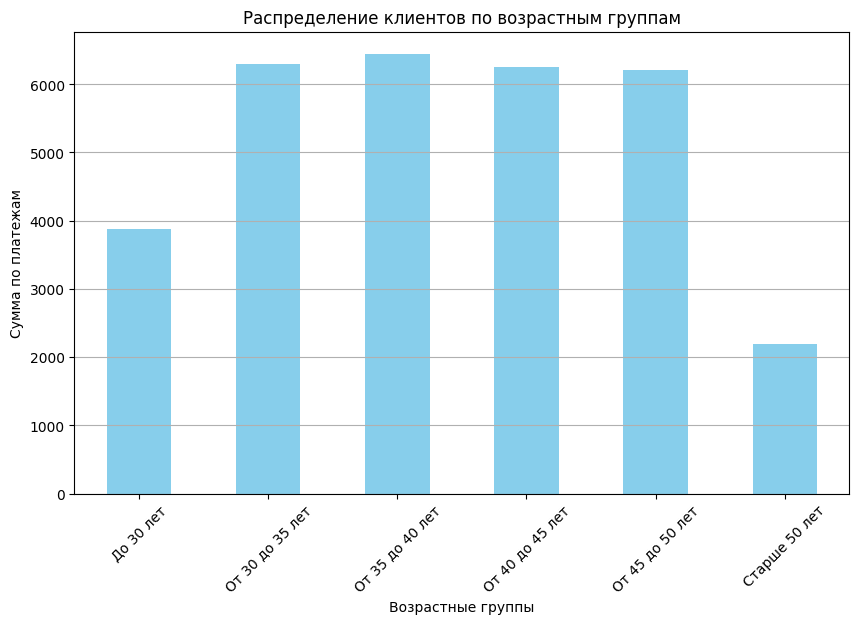

In [39]:
# Построение столбчатой диаграммы
plt.figure(figsize=(10, 6))
age_group_summary.plot(kind='bar', color='skyblue')
plt.title('Распределение клиентов по возрастным группам')
plt.xlabel('Возрастные группы')
plt.ylabel('Сумма по платежам')
plt.xticks(rotation=45)
plt.grid(axis='y')

# Показать график
plt.show()

Самая платежеспособная группа: От 35 до 40 лет с общей суммой месячных платежей 6451. Возрастные группы 30 - 35 лет (6296), 40 - 45 лет (6256) и 45 - 50 (6209) близки по значениям. Рстальные возрастные группы сильно отстают по платежеспасобности

In [40]:
# посмотреть зависимость типа тарифа от группы возраста пользователя

In [41]:
# Группировка данных по возрастной группе и типу подписки
grouped_data = df.groupby(['age_group', 'subscriptionType']).size().unstack()
grouped_data

<ipython-input-41-0d722274b51b>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = df.groupby(['age_group', 'subscriptionType']).size().unstack()


subscriptionType,Basic,Premium,Standard
age_group,,,
До 30 лет,123,98,86
От 30 до 35 лет,197,155,152
От 35 до 40 лет,222,138,156
От 40 до 45 лет,180,148,171
От 45 до 50 лет,208,142,147
Старше 50 лет,69,52,56


<Figure size 2000x600 with 0 Axes>

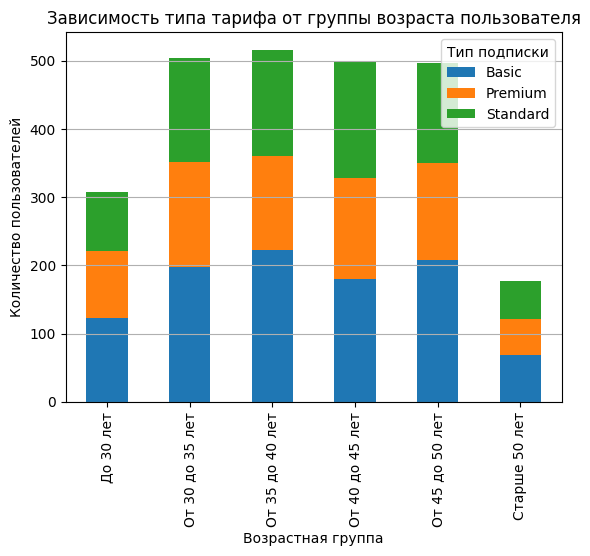

In [57]:
# Построение столбчатой диаграммы
plt.figure(figsize=(20, 6))
grouped_data.plot(kind='bar', stacked=True)

# Добавление заголовков и подписей осей
plt.title('Зависимость типа тарифа от группы возраста пользователя')
plt.xlabel('Возрастная группа')
plt.ylabel('Количество пользователей')

# Отображение легенды и сетки
plt.legend(title='Тип подписки')
plt.grid(axis='y')

# Отображение диаграммы
plt.show()

Явная зависимость типа тарифа от возрастной группы пользователя не наблюдается

In [43]:
# посмотреть зависимость типа тарифа от страны пользователя

In [44]:
# Группировка данных по стране и типу подписки
grouped_data_1 = df.groupby(['country', 'subscriptionType']).size().unstack()
grouped_data_1

subscriptionType,Basic,Premium,Standard
country,,,
Australia,31.0,101.0,51.0
Brazil,146.0,33.0,4.0
Canada,145.0,88.0,84.0
France,36.0,147.0,NaN
Germany,149.0,3.0,31.0
Italy,176.0,4.0,3.0
Mexico,4.0,NaN,179.0
Spain,110.0,212.0,129.0
United Kingdom,3.0,NaN,180.0


<Figure size 2000x800 with 0 Axes>

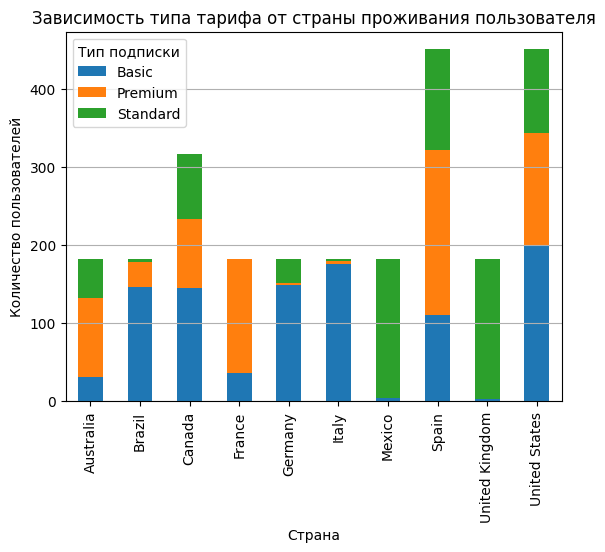

In [56]:
# Построение столбчатой диаграммы
plt.figure(figsize=(20, 8))
grouped_data_1.plot(kind='bar', stacked=True)

# Добавление заголовков и подписей осей
plt.title('Зависимость типа тарифа от страны проживания пользователя')
plt.xlabel('Страна')
plt.ylabel('Количество пользователей')

# Отображение легенды и сетки
plt.legend(title='Тип подписки')
plt.grid(axis='y')

# Отображение диаграммы
plt.show()

Зависимость типа тарифа от страны проживания пользователя:
- в Австралии, Испании, США и Канаде распределение пользователей по типам подписки примерно одинаковое
- в Aнглии и Мексике подписчики явно предпочитают Standart
- в Италии, Германии и Бразилии в большинстве пользователи выбирают Basic
- во Франции более популярен Premium

# Выводы

In [46]:
# на основании исследовательского анализа данных выявить закономерности и описать в формате нумерованного списка

1 Количество уникальных пользователей: 2500

2 Распределние пользователей по возрасту равномерное Минимальный возраст - 26 лет, средний - 3838, а самый пожилой клент в возрасте 51 год

3 Количество мужчин и женщин практически одинаково (49,7% и 50,3% соответственно)

4 Самый популярный девайс у пользователей - Laptop, на втором месте - Tablet, третье место - Smartphone, самый непопулярный девайс - Smart TV

5 Самая популярная подписка - Basic (999). Подписка Standard (768) превышает Premium (733) символически

6 Больше всего пользователей в United States и Spain Canada (451). Чуть меньше в (317). В остальных странах польвателей менее чем по 183 человека

7 С 2022-05 по 2022-11 наблюдался резкий приток клиентов и соответственно с 2022-09 до 2022-11 наблюдается значительный рост выручки сервиса. Затем до 2023-06 величина выручки практически не увеличивалась, а после 2023-06 наступил спад

6 Самая платежеспособная возрстная группа: От 35 до 40 лет с общей суммой месячных платежей 6451. Возрастные группы 30 - 35 лет (6296), 40 - 45 лет (6256) и 45 - 50 (6209) близки по значениям. Остальные возрастные группы сильно отстают по платежеспасобности

7 Явная зависимость типа тарифа от возрастной группы пользователя не наблюдается

8 Зависимость типа тарифа от страны проживания пользователя:
- в Австралии, Испании, США и Канаде распределение пользователей по типам подписки примерно одинаковое
- в Aнглии и Мексике подписчики явно предпочитают Standart
- в Италии, Германии и Бразилии в большинстве пользователи выбирают Basic
- во Франции более популярен Premium